# file path を DataFrame にする

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
import nibabel as nib
from glob import glob
from pathlib import Path
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

## challenge
#### columns : FilePathImage, FileName, FilePathMask
- 上記の　columns　を作成して　DataFrame を作成

In [2]:
p_im = glob('../public-covid-data/rp_im/*')
p_im

['../public-covid-data/rp_im/1.nii.gz',
 '../public-covid-data/rp_im/2.nii.gz',
 '../public-covid-data/rp_im/3.nii.gz',
 '../public-covid-data/rp_im/4.nii.gz',
 '../public-covid-data/rp_im/5.nii.gz',
 '../public-covid-data/rp_im/6.nii.gz',
 '../public-covid-data/rp_im/7.nii.gz',
 '../public-covid-data/rp_im/8.nii.gz',
 '../public-covid-data/rp_im/9.nii.gz']

In [3]:
# p = os.path.split(p[1])
# p
# ('../public-covid-data/rp_im', '2.nii.gz')

In [4]:
FileName = []
for _, i in enumerate(p_im):
    p_im = os.path.split(i)
    FileName.append(p_im[1])
FileName

['1.nii.gz',
 '2.nii.gz',
 '3.nii.gz',
 '4.nii.gz',
 '5.nii.gz',
 '6.nii.gz',
 '7.nii.gz',
 '8.nii.gz',
 '9.nii.gz']

In [5]:
p_msk = glob('../public-covid-data/rp_msk/*')
p_msk

['../public-covid-data/rp_msk/1.nii.gz',
 '../public-covid-data/rp_msk/2.nii.gz',
 '../public-covid-data/rp_msk/3.nii.gz',
 '../public-covid-data/rp_msk/4.nii.gz',
 '../public-covid-data/rp_msk/5.nii.gz',
 '../public-covid-data/rp_msk/6.nii.gz',
 '../public-covid-data/rp_msk/7.nii.gz',
 '../public-covid-data/rp_msk/8.nii.gz',
 '../public-covid-data/rp_msk/9.nii.gz']

## DataFrame 作成

In [6]:
p_im = glob('../public-covid-data/rp_im/*')
p_msk = glob('../public-covid-data/rp_msk/*')
filename = []


for _, i in enumerate(p_im):
    p = os.path.split(i)
    filename.append(p[1])


data = {
    'FilePathImage': p_im,
    'FileName': filename,
    'FilePathMask': p_msk
}

df = pd.DataFrame(data)
df

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


## 回答

In [7]:
glob('../public-covid-data/rp_im/*')

['../public-covid-data/rp_im/1.nii.gz',
 '../public-covid-data/rp_im/2.nii.gz',
 '../public-covid-data/rp_im/3.nii.gz',
 '../public-covid-data/rp_im/4.nii.gz',
 '../public-covid-data/rp_im/5.nii.gz',
 '../public-covid-data/rp_im/6.nii.gz',
 '../public-covid-data/rp_im/7.nii.gz',
 '../public-covid-data/rp_im/8.nii.gz',
 '../public-covid-data/rp_im/9.nii.gz']

In [8]:
{'FilePathImage':glob('../public-covid-data/rp_im/*')}

{'FilePathImage': ['../public-covid-data/rp_im/1.nii.gz',
  '../public-covid-data/rp_im/2.nii.gz',
  '../public-covid-data/rp_im/3.nii.gz',
  '../public-covid-data/rp_im/4.nii.gz',
  '../public-covid-data/rp_im/5.nii.gz',
  '../public-covid-data/rp_im/6.nii.gz',
  '../public-covid-data/rp_im/7.nii.gz',
  '../public-covid-data/rp_im/8.nii.gz',
  '../public-covid-data/rp_im/9.nii.gz']}

- *path 自体を　value　にしてしまう*
    - *今回作成したい　columns　を　**Key**　とする*


#### Key　:　value の dictionary を作成する事で簡単に　DataFrame が作成できる

In [9]:
df = pd.DataFrame({'FilePathImage':glob('../public-covid-data/rp_im/*')})
df

,FilePathImage
0,../public-covid-data/rp_im/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz


In [10]:
[p.split('/')[-1] for p in glob('../public-covid-data/rp_im/*')]

['1.nii.gz',
 '2.nii.gz',
 '3.nii.gz',
 '4.nii.gz',
 '5.nii.gz',
 '6.nii.gz',
 '7.nii.gz',
 '8.nii.gz',
 '9.nii.gz']

In [11]:
rp_im_df = pd.DataFrame({'FilePath': glob('../public-covid-data/rp_im/*'),
'FileName': [p.split('/')[-1] for p in glob('../public-covid-data/rp_im/*')]})
rp_im_df

,FilePath,FileName
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz


In [12]:
rp_msk_df = pd.DataFrame({'FilePath': glob('../public-covid-data/rp_msk/*'),
'FileName': [p.split('/')[-1] for p in glob('../public-covid-data/rp_msk/*')]})
rp_msk_df

,FilePath,FileName
0,../public-covid-data/rp_msk/1.nii.gz,1.nii.gz
1,../public-covid-data/rp_msk/2.nii.gz,2.nii.gz
2,../public-covid-data/rp_msk/3.nii.gz,3.nii.gz
3,../public-covid-data/rp_msk/4.nii.gz,4.nii.gz
4,../public-covid-data/rp_msk/5.nii.gz,5.nii.gz
5,../public-covid-data/rp_msk/6.nii.gz,6.nii.gz
6,../public-covid-data/rp_msk/7.nii.gz,7.nii.gz
7,../public-covid-data/rp_msk/8.nii.gz,8.nii.gz
8,../public-covid-data/rp_msk/9.nii.gz,9.nii.gz


## merge する

In [13]:
df = rp_im_df.merge(rp_msk_df, on='FileName', suffixes=('Image', 'Mask'))
df

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


#### 上記のように書き連ねて行くと Note book がカオス状態になるので関数を作成して　script file　に記述する
- 似たような code がある場合には、１つの関数にしてしまって　parameter をスイッチする事によって出力を変える
    - **メンテナンスもし易い、　code がスッキリして、　読解しやすい　code　になる**

In [14]:
glob('../public-covid-data/rp_im/*')

['../public-covid-data/rp_im/1.nii.gz',
 '../public-covid-data/rp_im/2.nii.gz',
 '../public-covid-data/rp_im/3.nii.gz',
 '../public-covid-data/rp_im/4.nii.gz',
 '../public-covid-data/rp_im/5.nii.gz',
 '../public-covid-data/rp_im/6.nii.gz',
 '../public-covid-data/rp_im/7.nii.gz',
 '../public-covid-data/rp_im/8.nii.gz',
 '../public-covid-data/rp_im/9.nii.gz']

In [15]:
# 関数作成
def get_df(folder='ra_im'):
    data_dict = pd.DataFrame({'FilePath': glob('../public-covid-data/{}/*'.format(folder)),
                            'FileName': [p.split('/')[-1] for p in glob('../public-covid-data/{}/*'.format(folder))]})
    return data_dict

In [16]:
def get_df_all():
    rp_im_df = get_df('rp_im')
    rp_msk_df = get_df('rp_msk')
    return rp_im_df.merge(rp_msk_df, on='FileName', suffixes=('Image', 'Mask'))

In [17]:
df = get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


#### 上記の関数を　script file にまとめる事により
- *team で同じ関数を共有できるし、同じ関数を作らなくてもいい*
- *効率的で汎用性が高い開発ができる*

## 上記の code をもっと汎用性があって誰でも使用できるようにする
- *path　の　hard coding を修正*
    - **parameter ( 引数 )　にして user によって変更できるようにする**

In [18]:
# 関数作成
def get_df(base_path='public-covid-data', folder='ra_im'):
    data_dict = pd.DataFrame({'FilePath': glob('{}/{}/*'.format(base_path, folder)),
                            'FileName': [p.split('/')[-1] for p in glob('{}/{}/*'.format(base_path, folder))]})
    return data_dict


def get_df_all(base_path='public-covid-data'):
    rp_im_df = get_df(base_path, folder='rp_im')
    rp_msk_df = get_df(base_path, folder='rp_msk')
    return rp_im_df.merge(rp_msk_df, on='FileName', suffixes=('Image', 'Mask'))

In [19]:
get_df_all('../public-covid-data') #　自分のpathを指定して使用する事ができる

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


In [20]:
import ctvis

In [21]:
ctvis.get_df_all('../public-covid-data')

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


#### **private function**
- *get_df のように script内でしか呼ばれない関数*
    - 接頭辞に _ (アンダースコア)をつける
    - **この　script　内でしか呼ばれませんと明示的に伝える**


- <u>呼ぼうとすれば呼べるが...</u>
    - *外から呼ばれるよな事は想定していない関数ですよ！という意思表示*
    - *pythonの処理的には関係が無いので注意する*


#### **from　ctvis　import　*　( アスタリスク )** での　import
- *( * : アスタリスク )で import した時には _ (アンダースコア)の関数は呼び出せない*

# NifTI データを NumPy Array としてロードする

In [22]:
df = ctvis.get_df_all('../public-covid-data')

In [23]:
sample_path = df['FilePathImage'].iloc[0]
nifti = nib.load(sample_path)

In [24]:
data = nifti.get_fdata()

In [25]:
data.shape

(630, 630, 45)

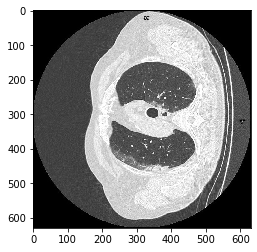

In [26]:
plt.imshow(data[:, :, 10], cmap='gray')

- *今画像の状態 indexの状態が　( width, height, z(奥行き) )　になっている*

## np.rollaxis( )

In [27]:
a = np.ones((4, 3, 2, 1))
a.shape

(4, 3, 2, 1)

In [28]:
np.rollaxis(a, axis=1, start=0).shape

(3, 4, 2, 1)

1. axis　で指定した　index　の値を抜き取る
2. start　で指定した　index　の値に 1. で抜き取った値を入れる
3. 値を抜いて、ずらして、入れる

In [29]:
data = np.rollaxis(data, axis=1, start=0)

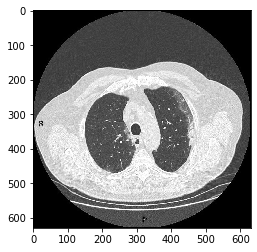

In [30]:
plt.imshow(data[:, :, 10], cmap='gray')

- *index　を　( height, width, z(奥行き))　に変更して　imshowをする*

## 上記を関数化して　script file に記述する

In [31]:
df = ctvis.get_df_all('../public-covid-data')

In [32]:
def load_nifti(sample_path, idx):
    nifti = nib.load(sample_path)
    data = nifti.get_fdata()
    data = np.rollaxis(data, axis=1, start=0)
    return plt.imshow(data[:, :, idx], cmap='gray')

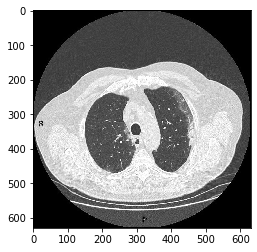

In [33]:
sample_path = sample_path = df['FilePathImage'].iloc[0]
load_nifti(sample_path, 10)

## 回答

In [34]:
df = ctvis.get_df_all('../public-covid-data')

In [35]:
def load_nifti(path):
    nifti = nib.load(path)
    data = nifti.get_fdata()
    return np.rollaxis(data, 1)

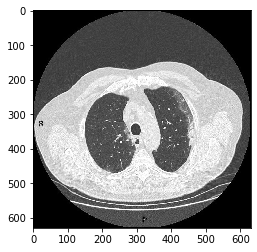

In [36]:
sample_path = df['FilePathImage'].iloc[0]
data = load_nifti(sample_path)
plt.imshow(data[:, :, 10], cmap='gray')

## script からの読み込み Test

In [37]:
df = ctvis.get_df_all('../public-covid-data')

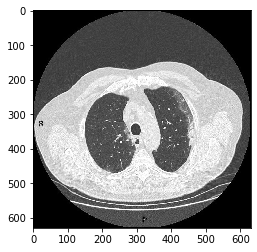

In [38]:
sample_path = df['FilePathImage'].iloc[0]
data = ctvis.load_nifti(sample_path)
plt.imshow(data[:, :, 10], cmap='gray')

# マスクデータを RGB にする

In [39]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
seg_data.shape

(630, 630, 45)

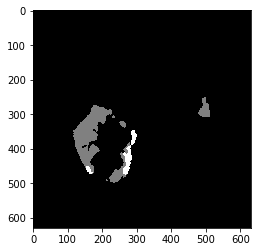

In [40]:
plt.imshow(seg_data[:, :, 30], cmap='gray')

In [41]:
np.unique(seg_data[:, :, 30])

array([0., 1., 2.])

- *mask data に応じて RGB のチャネルをつけて表示させる*
    - **0　:　background　[ 0, 0, 0 ]**
    - **1　:　Red　[ 255, 0, 0 ]**
    - **2　:　Green　[ 0, 255, 0 ]**
    - **3　:　Blue　[ 0, 0, 255 ]**


- <u>Mask data に応じた RGB の data を作成することができる</u>
    - ラベル別に色付けをする　(RGB)

In [42]:
shp = seg_data.shape
seg_color = np.zeros((shp[0], shp[1], shp[2], 3))
seg_color.shape

(630, 630, 45, 3)

In [43]:
zeros = np.zeros((2, 2))
zeros

array([[0., 0.],
       [0., 0.]])

In [44]:
filter_array = np.array([[True, False], [True, False]])
filter_array

array([[ True, False],
       [ True, False]])

In [45]:
zeros[filter_array] = 1
zeros

array([[1., 0.],
       [1., 0.]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


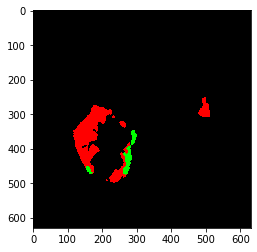

In [46]:
# filter_array = np.where(seg_data==1, True, False)
# filter_array = np.equal(seg_data, 1)
# seg_color[filter_array] = [255, 0, 0]
ggo_color = [255, 0 , 0]
consolidation_color = [0, 255 , 0]
effusion_color = [0, 0 , 255]
seg_color[np.equal(seg_data, 1)] = ggo_color
seg_color[np.equal(seg_data, 2)] = consolidation_color
seg_color[np.equal(seg_data, 3)] = effusion_color
plt.imshow(seg_color[:, :, 30])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


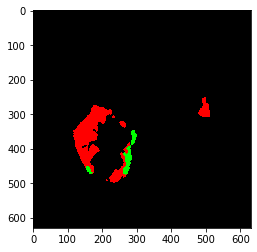

In [47]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
shp = seg_data.shape

# 箱を作成　：　全て０の値にする : np./uint8 でもOK, 64bitだとメモリを消費してしまう為 32bitにしている
seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

# カラーラベル定義
ggo_color = [255, 0 , 0]
consolidation_color = [0, 255 , 0]
effusion_color = [0, 0 , 255]

# 色づけ
seg_color[np.equal(seg_data, 1)] = ggo_color
seg_color[np.equal(seg_data, 2)] = consolidation_color
seg_color[np.equal(seg_data, 3)] = effusion_color

# plot : 30枚目
plt.imshow(seg_color[:, :, 30])

## 上記を関数にする

In [48]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)

In [49]:
def label_color(mask_volume,
               ggo_coloror = [255, 0 , 0],
               consolidation_color = [0, 255 , 0],
               effusion_color = [0, 0 , 255]):
    shp = mask_volume.shape
    # 箱作成
    mask_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)
    # 色付け
    mask_color[np.equal(mask_volume, 1)] = ggo_color
    mask_color[np.equal(mask_volume, 2)] = consolidation_color
    mask_color[np.equal(mask_volume, 3)] = effusion_color

    return mask_color

In [50]:
mask_color = label_color(seg_data)
mask_color.shape

(630, 630, 45, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


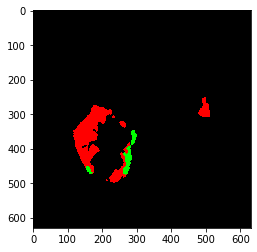

In [51]:
plt.imshow(mask_color[:, :, 30])

## script からの読み込み Test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


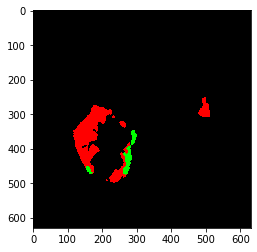

In [52]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
mask_color = ctvis.label_color(seg_data)
plt.imshow(mask_color[:, :, 30])

# HUをグレースケールに変換する

In [53]:
df = ctvis.get_df_all('../public-covid-data')
df

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


In [54]:
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)
print(volume.shape)
print(mask.shape)
print(mask_color.shape)
print(volume.min())
print(volume.max())
print(mask_color.min())
print(mask_color.max())

(630, 630, 45)
(630, 630, 45)
(630, 630, 45, 3)
-1414.765380859375
212.7372589111328
0.0
255.0


- *CT data と Mask color data が合っていないので上手く　　Overlay　できない*
    - **Overlay　できるようにする為 CT data を　0 ~ 255 の値に変換する**

## 値の rerange をするアルゴリズム
- *CT data と Mask color data が合っていないので上手く　　Overlay　できない*
    - **Overlay　できるようにする為 CT data を　0 ~ 255 の値に変換する**


- *例 ）　-1300 ~ 300 の値を持つ　CT data を　0 ~ 255 に変換する*
    1. -1300 ~ 300　->　0 ~ 1
        - X -最小値 / （最大値 - 最小値）
        $$\frac{(x-min)}{max-min}$$
        - [ 2, 3, 4, 5, 6, 7 ] の場合
        $$\frac{7-2}{7-2}=1$$
        $$\frac{6-2}{7-2}=\frac{4}{5}$$
        $$\frac{5-2}{7-2}=\frac{3}{5}$$
        $$\frac{4-2}{7-2}=\frac{2}{5}$$
        $$\frac{3-2}{7-2}=\frac{1}{5}$$
        $$\frac{2-2}{7-2}=\frac{0}{5}=0$$
    2. 0 ~ 1　->　0 ~ 255
        - ＊（掛ける） 255

In [55]:
maxhu = np.max(volume)
minhu = np.min(volume)
volume_rerange = (volume - minhu) / (maxhu-minhu)
volume_rerange.max()

1.0

- もし二次元の画像が入ってきた場合に、全ての　pix　が真っ黒で　0　で error　になてしまう可能性もある！
    - if文　を使用して max と min が同じだったら...　してはじいてあげる。 という風にしてもいい

In [56]:
# 0 が入ってしまうと error になってしまうので　error ハンドリングをしておく
maxhu = np.max(volume)
minhu = np.min(volume)
volume_rerange = (volume - minhu) / 0
volume_rerange.max()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


nan

In [57]:
volume_rerange

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [58]:
# error　ハンドリング
maxhu = np.max(volume)
minhu = np.min(volume)
volume_rerange = (volume - minhu) / max((maxhu-minhu), 1e-3)
volume_rerange.max()

1.0

In [59]:
maxhu = np.max(volume)
minhu = np.min(volume)
volume_rerange = (volume - minhu) / max((maxhu-minhu), 1e-3)
volume_rerange = volume_rerange * 255
print(volume_rerange.min())
print(volume_rerange.max())
print(volume_rerange.shape)

0.0
255.0
(630, 630, 45)


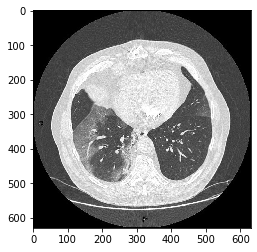

In [60]:
plt.imshow(volume_rerange[:, :, 30], cmap='gray')

### 値は0 ~ 255 にはなったが… 
- *CT data は　RGBのチャネルになっていないので、shpaeが違う*
    - **color 画像ではないが、重ね合わせる時に　shape が合っていた方が重ね合わせ易い**

In [61]:
volume_rerange.shape

(630, 630, 45)

In [62]:
volume_rerange = np.stack([volume_rerange, volume_rerange, volume_rerange], axis=-1)

volume_rerange.shape

(630, 630, 45, 3)

In [63]:
maxhu = np.max(volume)
minhu = np.min(volume)
volume_rerange = (volume - minhu) / max((maxhu-minhu), 1e-3)
volume_rerange = volume_rerange * 255
volume_rerange = np.stack([volume_rerange, volume_rerange, volume_rerange], axis=-1)
print(volume_rerange.min())
print(volume_rerange.max())
print(volume_rerange.shape)

0.0
255.0
(630, 630, 45, 3)


## 上記を関数にする

In [65]:
df = ctvis.get_df_all('../public-covid-data')
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [66]:
def hu_to_gray(volume):
    maxhu = np.max(volume)
    minhu = np.min(volume)
    volume_rerange = (volume - minhu) / max((maxhu-minhu), 1e-3)
    volume_rerange = volume_rerange * 255
    volume_rerange = np.stack([volume_rerange, volume_rerange, volume_rerange], axis=-1)
    
    # astype(np.uint8) にすることで　0 ~ 255 の　int　で返してくれる
    return volume_rerange.astype(np.uint8)

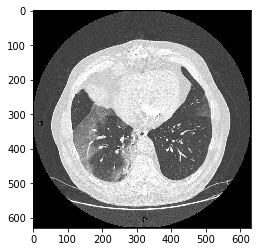

In [68]:
volume_gray = hu_to_gray(volume)
plt.imshow(volume_gray[:, :, 30])

In [70]:
print(volume_gray.max())
print(volume_gray.min())
print(volume_gray.shape)

255
0
(630, 630, 45, 3)


## script からの読み込み Test

In [71]:
df = ctvis.get_df_all('../public-covid-data')
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

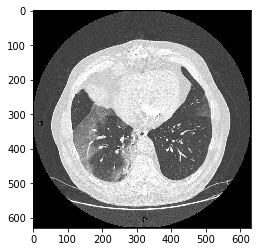

In [72]:
volume_gray = ctvis.hu_to_gray(volume)
plt.imshow(volume_gray[:, :, 30])

In [73]:
print(volume_gray.max())
print(volume_gray.min())
print(volume_gray.shape)

255
0
(630, 630, 45, 3)
